In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [239]:
warnings.filterwarnings('ignore')

# Definición del problema

Crear un modelo de regresión que permita describir la correlación de la temperatura y presión.

In [240]:
df=pd.read_csv("C:\\Users\\amado\\Desktop\\Blog\\Base de datos\\polylinearregression.csv")

In [237]:
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sno          6 non-null      int64  
 1   Temperature  6 non-null      int64  
 2   Pressure     6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 272.0 bytes


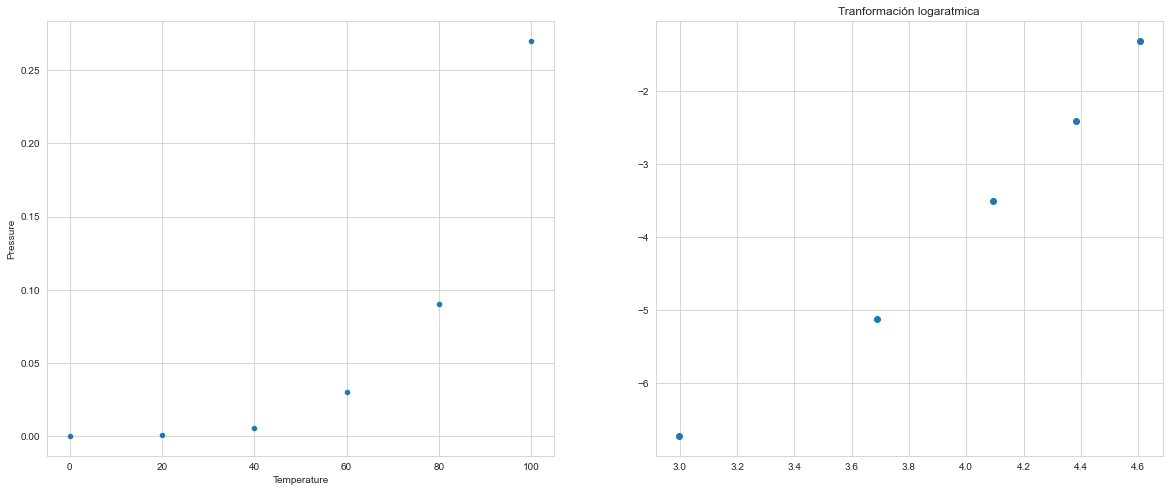

In [242]:
sns.set_style(style='whitegrid')

fig,(ax_0,ax_1)=plt.subplots(1,2,figsize=(20,8))

sns.scatterplot(x='Temperature',y='Pressure',data=df,ax=ax_0)

ax_1.set_title('Tranformación logaratmica')
ax_1.scatter(np.log(df['Temperature']),np.log(df['Pressure']))


plt.show()

Se pueden observar gráficamente una correlación, pero claramente no se ve lineal, pero si hacemos una tranfromación logaritmica los datos se aprecian que ahora si tienen más naturaleza lineal, pero en este caso nos enfocaremos en crear la regresión polinomial.

In [243]:
df=df.drop(['sno'],axis='columns')
df=df[df['Temperature']>min(df['Temperature'])]

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  5 non-null      int64  
 1   Pressure     5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 120.0 bytes


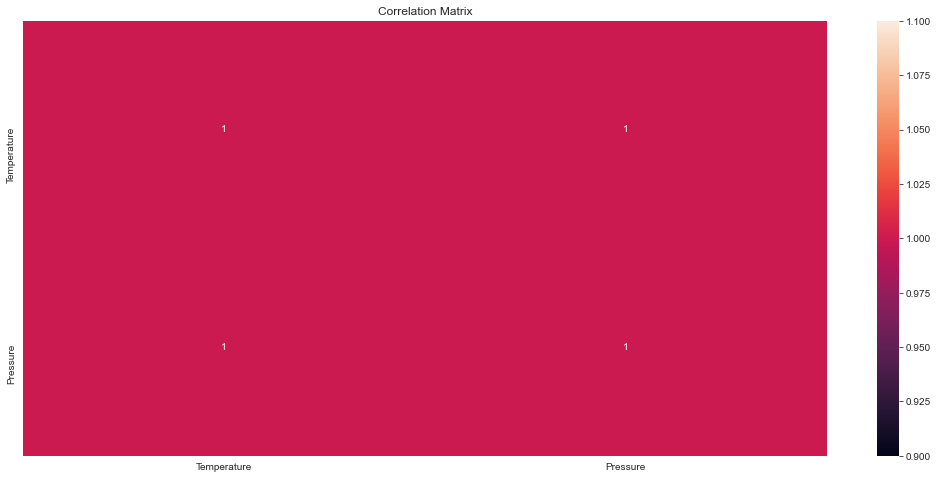

In [245]:
plt.subplots(1,1,figsize=(18,8))

plt.title('Correlation Matrix')
sns.heatmap(df.corr(method='spearman'),annot=True)

plt.show()

In [246]:
X=df[['Temperature']]
y=df.Pressure

# Tranformación polinomial

In [248]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)

X_poly=poly.fit_transform(X)


poly.fit(X_poly,y)

PolynomialFeatures()

Hacemos una tranformación polinomial de grado 2.

In [249]:
lm_poly=LinearRegression()


lm_poly.fit(X_poly,y)

LinearRegression()

In [250]:
lm_poly.score(X_poly,y)

0.9785531370038412

In [251]:
lm_poly.predict(X_poly)

array([ 0.01032, -0.01032,  0.02424,  0.114  ,  0.25896])

In [252]:
lm_log=LinearRegression().fit(X,np.log(y))

In [253]:
lm_log.score(X,np.log(y))

0.9901352860708408

In [254]:
lm_log.coef_,lm_log.intercept_

(array([0.06770126]), -7.8751285732328915)

In [258]:
def main():

    plt.scatter(X,y,color='k',marker='+',label='Valores originales')
    plt.plot(X,lm_poly.predict(X_poly),lw=2,label='Regresión polinomial',c='lightgreen')
    plt.plot(X,np.exp(lm_log.predict(X)),label='Regresión con trasformación logaritmica',c='skyblue')

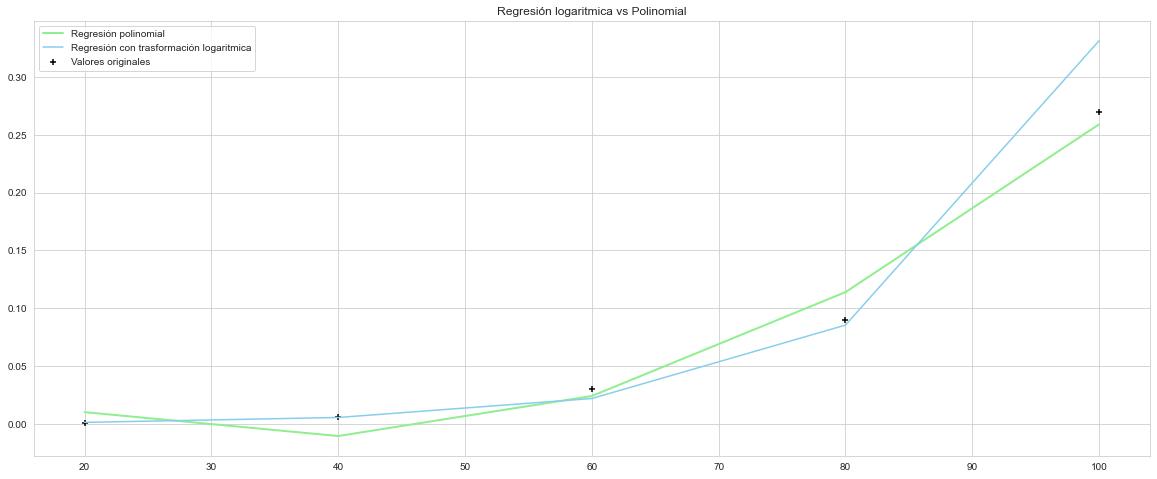

In [263]:
if __name__ =='__main__':
    
    plt.figure(figsize=(20,8))
    plt.title('Regresión logaritmica vs Polinomial')
    main()
    plt.legend()

In [270]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y,lm_poly.predict(X_poly))

0.00021611520000000014

In [272]:
mean_squared_error(y,lm_log.predict(X))

18.4916837885361

## Conclusión.


La regresión polinomial tiene un menor ajuste cuadrado pero tiene un porcentaje de error cuadrático medio mayor, como se aparecia en la gráfica con la último valor la regresión con transformación logaritmica está más lejos respecto al valor original.


Dicha regresión se ajusta bien a la mayoria de los datos, pero la polinomial generaliza de mejor forma.